In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
import math

In [ ]:
data = pd.read_excel("https://github.com/HarvianKhusnan/Tugas-KNN-Pengantar-Kecerdasan-Buatan---3/blob/0ea76e62d3ba22b8fa91a1fab2c5cf0589e758e2/traintest.xlsx?raw=true")
data

,id,x1,x2,x3,y
0,1,60,64,0,1
1,2,54,60,11,0
2,3,65,62,22,0
3,4,34,60,0,1
4,5,38,69,21,0
...,...,...,...,...,...
291,292,59,64,1,1
292,293,65,67,0,1
293,294,53,65,12,0
294,295,57,64,1,0


**EXPLORATORY DATA ANALYSIS**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      296 non-null    int64
 1   x1      296 non-null    int64
 2   x2      296 non-null    int64
 3   x3      296 non-null    int64
 4   y       296 non-null    int64
dtypes: int64(5)
memory usage: 11.7 KB


In [ ]:
data.describe()

,id,x1,x2,x3,y
count,296.000000,296.000000,296.000000,296.000000,296.000000
mean,148.500000,52.462838,62.881757,4.111486,0.736486
std,85.592056,10.896367,3.233753,7.291816,0.441285
min,1.000000,30.000000,58.000000,0.000000,0.000000
25%,74.750000,44.000000,60.000000,0.000000,0.000000
50%,148.500000,52.000000,63.000000,1.000000,1.000000
75%,222.250000,61.000000,65.250000,5.000000,1.000000
max,296.000000,83.000000,69.000000,52.000000,1.000000


In [ ]:
data.drop(columns = ['id'], axis = 1, inplace = True)
data

,x1,x2,x3,y
0,60,64,0,1
1,54,60,11,0
2,65,62,22,0
3,34,60,0,1
4,38,69,21,0
...,...,...,...,...
291,59,64,1,1
292,65,67,0,1
293,53,65,12,0
294,57,64,1,0


<function matplotlib.pyplot.show>

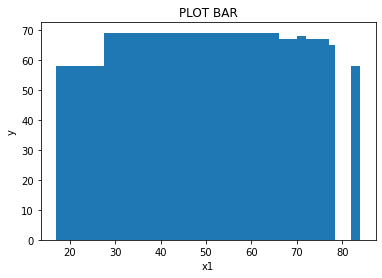

In [ ]:
plt.bar(data['x1'],data['x2'],data['x3'])
plt.title('PLOT BAR')
plt.xlabel('x1')
plt.ylabel('y')
plt.show

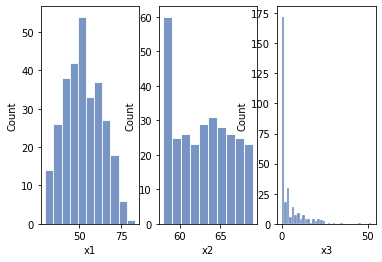

In [ ]:
fig, axs = plt.subplots(ncols=3)
sns.set(rc={'figure.figsize':(50,10)})
sns.histplot(data['x1'], ax=axs[0])
sns.histplot(data['x2'], ax=axs[1])
sns.histplot(data['x3'], ax=axs[2])

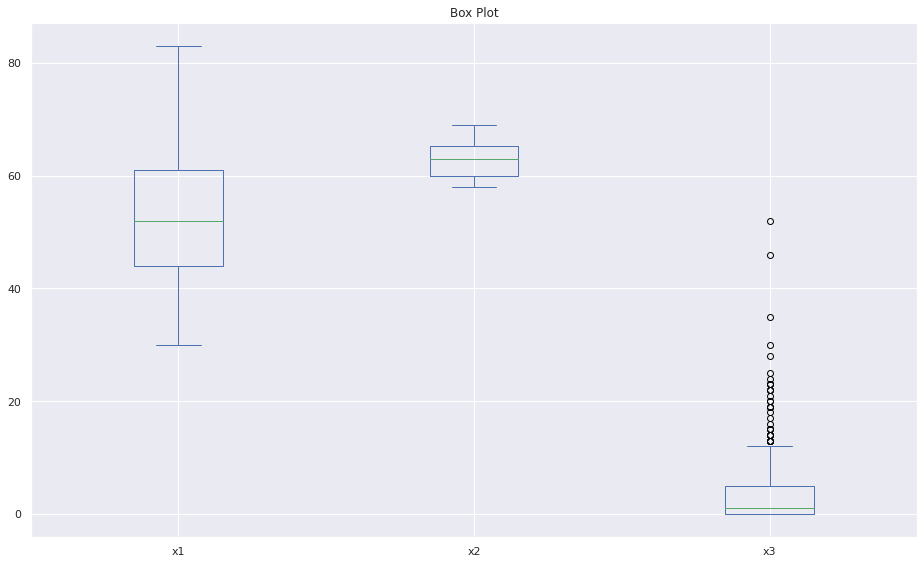

In [ ]:
plt.rcParams["figure.figsize"] = [13,8]
plt.rcParams["figure.autolayout"] = True
ax = data[['x1','x2','x3']].plot(kind='box',title='Box Plot')

NORMALISASI DATA

In [ ]:
#normalisasi
def minMax(data) :
    return (data.iloc[:,:4] - data.iloc[:,:4].min()) / (data.iloc[:,:4].max() - data.iloc[:,:4].min())


Normalized = minMax(data)
Normalized

,x1,x2,x3,y
0,0.566038,0.545455,0.000000,1.0
1,0.452830,0.181818,0.211538,0.0
2,0.660377,0.363636,0.423077,0.0
3,0.075472,0.181818,0.000000,1.0
4,0.150943,1.000000,0.403846,0.0
...,...,...,...,...
291,0.547170,0.545455,0.019231,1.0
292,0.660377,0.818182,0.000000,1.0
293,0.433962,0.636364,0.230769,0.0
294,0.509434,0.545455,0.019231,0.0


SPLIT DATASET

In [ ]:
df = Normalized 
df.to_numpy()
print(df)

           x1        x2        x3    y
0    0.566038  0.545455  0.000000  1.0
1    0.452830  0.181818  0.211538  0.0
2    0.660377  0.363636  0.423077  0.0
3    0.075472  0.181818  0.000000  1.0
4    0.150943  1.000000  0.403846  0.0
..        ...       ...       ...  ...
291  0.547170  0.545455  0.019231  1.0
292  0.660377  0.818182  0.000000  1.0
293  0.433962  0.636364  0.230769  0.0
294  0.509434  0.545455  0.019231  0.0
295  0.452830  0.090909  0.134615  1.0

[296 rows x 4 columns]


In [ ]:
def splitDependent(df):
  x = df.iloc[:,[0,1,2]].values
  y = df.iloc[:,[3]].values
  return x,y 

In [ ]:
def plot(akurasil,k):
  number = []
  for i in range(k):
    number.append(i)
  plt.plot(number,akurasil)
  plt.title("Hasil Akurasi")
  plt.xlabel("Nilai k")
  plt.ylabel("Akurasi")
  plt.show()

In [ ]:
def kFolds(df,k):
    folds = np.array_split(df,k)
    euclidlist, manhalist, minkowlist = [],[],[]
    
    for i in range(k):
        trainingSet = folds.copy()
        validationSet = folds[i]
        del trainingSet[i]
        trainingSet = pd.concat(trainingSet, sort=False)
        X, Y = splitDependent(trainingSet)
        Valx, valy = splitDependent(validationSet)

        hEuclidean, hManhattan, hMinkowski = knn(X,Y,Valx,valy,k)
        euclidlist.append(hEuclidean)
        manhalist.append(hManhattan)
        minkowlist.append(hMinkowski)

    print("Hasil Akurasi Euclidean")
    plot(euclidlist,k)
    print("Hasil Akurasi Manhattan")
    plot(manhalist,k)
    print("Hasil Akurasi Minkowski")
    plot(minkowlist,k)
        

    return 0

Hasil Akurasi Euclidean


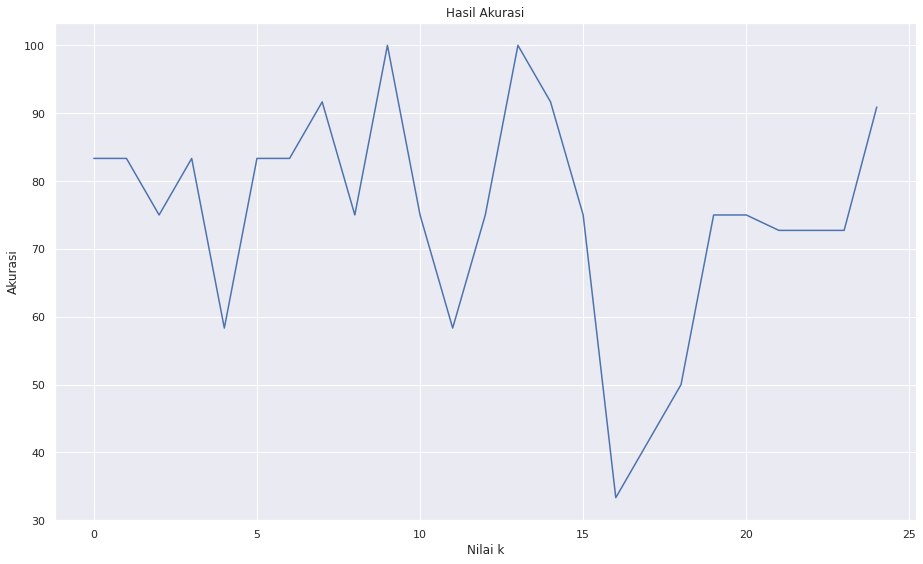

Hasil Akurasi Manhattan


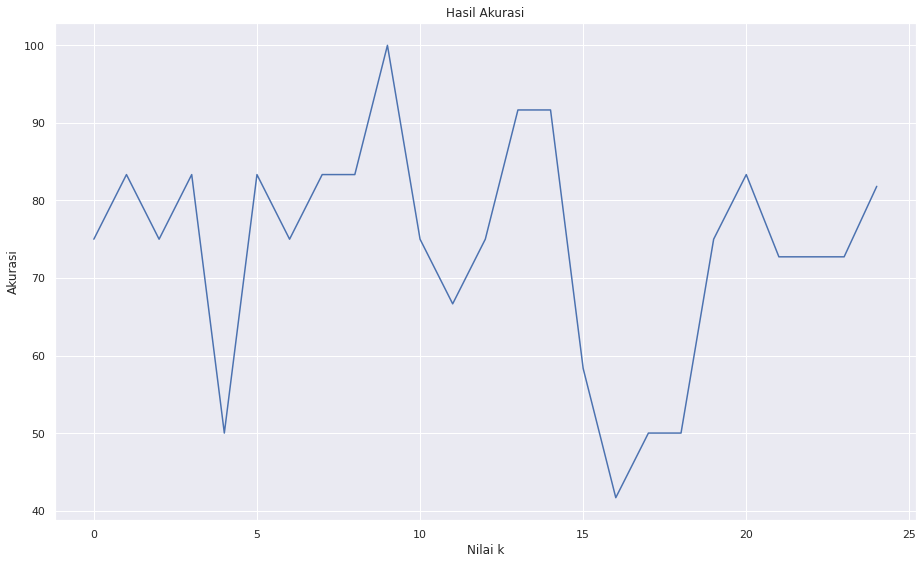

Hasil Akurasi Minkowski


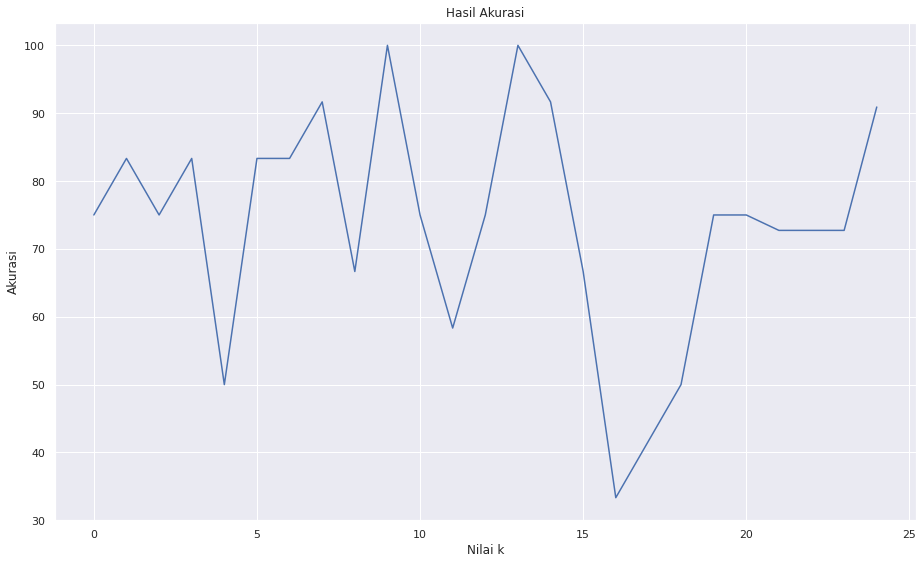

0

In [ ]:
kFolds(df,25)

Count Distance

In [ ]:
def euclidean(x,y,xval):
  result = []
  for i in xval : 
    resultTraining = []; idxtrain = 0
    for j in x : 
      dist = (i[0]-j[0])**2 + (i[1]-j[1])**2 + (i[2]-j[2])**2

      hasiltrain = [math.sqrt(dist),y[idxtrain][0]]
      resultTraining.append(hasiltrain)
      idxtrain -=-1
    resultTraining.sort()
    result.append(resultTraining)
  return(result)

def manhattan(x,y,xval): 
    result = []
    for i in xval:
        resultPerTraining = []; indexTraining = 0
        for j in x:
            d = abs(i[0]-j[0]) + abs(i[1]-j[1]) + abs(i[2]-j[2])
            #print(x)
            hasilPerTrainingData = [d,y[indexTraining][0]]
            resultPerTraining.append(hasilPerTrainingData)
            indexTraining += 1
        resultPerTraining.sort()
        result.append(resultPerTraining)
    return(result)

def minkowski(x,y,xval,h=3):
  result = []
  for i in xval:
    resulttrain = []; idxtrain = 0 
    for j in x :
      d = (abs(i[0]-j[0]))**h + (abs(i[1]-j[1]))**h + (abs(i[2]-j[2]))**h
      traindata = [d**(1/h),y[idxtrain][0]]
      resulttrain.append(traindata)
      idxtrain -=-1 
    resulttrain.sort()
    result.append(resulttrain)
  return(result)

In [ ]:
def neighbor(result,k):
  tonggo = []
  for data in result: 
    data = data [:k]
    tonggo.append(data)
  return tonggo 

In [ ]:
def number(result):
  count = 0; count1= 0; hasil = []
  for data in result : 
    for dataval in data : 
        if dataval[1] == 0.0:
            count += 1
        else:
            count1 += 1
        if count > count1:
            hasil.append(0)
        else:
            hasil.append(1)    
    return hasil


In [ ]:
def accuration(hasil,yVal):
    akurasi = 0
    for i in range(len(hasil)):
        if hasil[i] == yVal[i][0]:
                akurasi += 1
    return akurasi

KNN


In [ ]:
def knn(x,y,xval,yval,k):
    resEuclidean = euclidean(x,y,xval)
    resManhattan = manhattan(x,y,xval)
    resMinkowski = minkowski(x,y,xval)
    
    resultEuclidean = neighbor(resEuclidean,k)
    resultManhattan = neighbor(resManhattan,k)
    resultMinkowski = neighbor(resMinkowski,k)
    
    EuclideanLast  = number(resultEuclidean)
    ManhattanLast  = number(resultManhattan) 
    MinkowskiLast  = number(resultMinkowski)
    
    hasilAkurasiEuclidean = (accuration(EuclideanLast,yval)/len(yval))*100
    hasilAkurasiManhattan = (accuration(ManhattanLast,yval)/len(yval))*100
    hasilAkurasiMinkowski = (accuration(MinkowskiLast,yval)/len(yval))*100
  
    return hasilAkurasiEuclidean,hasilAkurasiManhattan,hasilAkurasiMinkowski

In [ ]:
dftest = pd.read_excel("https://github.com/HarvianKhusnan/Tugas-KNN-Pengantar-Kecerdasan-Buatan---3/blob/0ea76e62d3ba22b8fa91a1fab2c5cf0589e758e2/traintest.xlsx?raw=true", "test")

In [ ]:
dftest

,id,x1,x2,x3,y
0,297,43,59,2,?
1,298,67,66,0,?
2,299,58,60,3,?
3,300,49,63,3,?
4,301,45,60,0,?
5,302,54,58,1,?
6,303,56,66,3,?
7,304,42,69,1,?
8,305,50,59,2,?
9,306,59,60,0,?


In [ ]:
datatrainNorm = minMax(dftest)
datatrainNorm

,id,x1,x2,x3
0,0.000000,0.04,0.090909,0.666667
1,0.111111,1.00,0.727273,0.000000
2,0.222222,0.64,0.181818,1.000000
3,0.333333,0.28,0.454545,1.000000
4,0.444444,0.12,0.181818,0.000000
5,0.555556,0.48,0.000000,0.333333
6,0.666667,0.56,0.727273,1.000000
7,0.777778,0.00,1.000000,0.333333
8,0.888889,0.32,0.090909,0.666667
9,1.000000,0.68,0.181818,0.000000


In [ ]:
xtrain, ytrain = splitDependent(Normalized)
xtest,ytest = splitDependent(datatrainNorm)

resulteuclid = euclidean(xtrain,ytrain,xtest)
resultmanha = manhattan(xtrain,ytrain,xtest)
resultminkow = minkowski(xtrain, ytrain, xtest)

resulteuclidneigh = neighbor(resulteuclid,10)
resultmanhaneigh = neighbor(resultmanha,10)
resultminkowneigh = neighbor(resultminkow,10)

euclidLast = number(resulteuclidneigh)
ManhaLast = number(resultmanhaneigh)
MinkowLast = number(resultmanhaneigh)

print(euclidLast)
print(ManhaLast)
print(MinkowLast)


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
# Split dataset to train and test data
test_size = 0.2
trainingSet = Normalized.sample(frac = 1-test_size, random_state = 84)
validationSet = Normalized.drop(trainingSet.index)

trainingSet.reset_index(drop=True, inplace=True)
validationSet.reset_index(drop=True, inplace=True)

print(f"No. of training examples: {trainingSet.shape[0]}")
print(f"No. of testing examples: {validationSet.shape[0]}")

No. of training examples: 237
No. of testing examples: 59


In [ ]:
xTrain,yTrain = splitDependent(trainingSet)
xVal,yVal = splitDependent(validationSet)

resultEuclidean = euclidean(xTrain,yTrain,xVal)
resultManhattan = manhattan(xTrain,yTrain,xVal)
resultMinkowski = minkowski(xTrain,yTrain,xVal)

resultEuclideannei = neighbor(resultEuclidean,25)
resultManhattannei = neighbor(resultManhattan,25)
resultMinkowskinei = neighbor(resultMinkowski,25)

finalEuclidean  = number(resultEuclideannei)
finalManhattan  = number(resultManhattannei) 
finalMinkowski  = number(resultMinkowskinei)

hasilAkurasiEuclidean = (accuration(finalEuclidean,yVal)/len(yVal))*100
hasilAkurasiManhattan = (accuration(finalManhattan,yVal)/len(yVal))*100
hasilAkurasiMinkowski = (accuration(finalMinkowski,yVal)/len(yVal))*100
#print(hasilAkurasiEuclidean,hasilAkurasiManhattan,hasilAkurasiMinkowski)

print(str(hasilAkurasiEuclidean)+"%")
print(str(hasilAkurasiManhattan)+"%")
print(str(hasilAkurasiMinkowski)+"%")

76.27118644067797%
74.57627118644068%
76.27118644067797%


In [ ]:
print(finalEuclidean)
print(finalManhattan)
print(finalMinkowski)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
